In [2]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
import CoolProp.Plots as CPP

In [3]:
#approximating mdot
GPH2Kgs = .00078 #gallons per hour (steam evaporated) to kg/s
mdot_sap_high = 12*GPH2Kgs

In [4]:
Tsapi = 278 # [K] about 40F
Pa = 101.3 * 10**3 # average ambient pressure [Pa]
mdot_sap_low = .001 #[kg/s]
#Qdot_fire = 20000 #[20 kW from stove]

In [5]:
#calculating the Qdot we need 
hsap = CP.PropsSI('H','P',Pa,'T', Tsapi,'water') #[j/kg]
hsteam = CP.PropsSI('H','P',Pa,'Q', 1 ,'water') #[j/kg]
Qdot_need = mdot_sap_high* (hsteam-hsap)

print(Qdot_need)

24851.073858365093


In [6]:
def simpleEvap(mdot_sap, Tsapi):
    hsap = CP.PropsSI('H','P',Pa,'T', Tsapi,'water') #[j/kg]
    hsteam = CP.PropsSI('H','P',Pa,'Q', 1 ,'water') #[j/kg]
    Qdot_need = mdot_sap*(hsteam-hsap)
    return Qdot_need

In [7]:
n=50 
mdots = np.linspace(mdot_sap_low, mdot_sap_high, n)
results = []
for j in range(0, n):
    if j == 0:
        results = simpleEvap(mdots[j], Tsapi)
    else:
        newrow = simpleEvap(mdots[j], Tsapi)
        results = np.vstack([results, newrow])

Text(0.5, 1.0, 'Heat Input in Relation to Mass Flow')

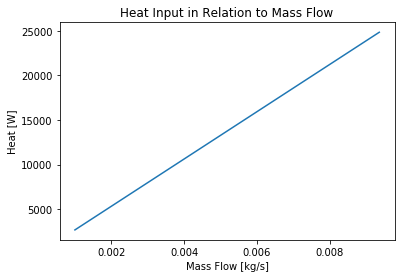

In [9]:
plt.plot(mdots, results)
plt.xlabel('Mass Flow [kg/s]')
plt.ylabel('Heat [W]')
plt.title('Heat Input in Relation to Mass Flow')

In [ ]:
n=50 
mdots = np.linspace(mdot_sap_low, mdot_sap_high, n)
Tsapi = np.linspace(Tsapi, 360, n)
results = []
for j in range(0, n):
    for i in range(0,n):
    if j == 0:
        results = simpleEvap(mdots[j], Tsapi)
    else:
        newrow = simpleEvap(mdots[j], Tsapi)
        results = np.vstack([results, newrow])